In [2]:
library(ggplot2)
library(tidyverse)
library(magrittr)
library(igraph)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.2.0     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
✔ purrr   1.0.1     

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is mas

In [4]:
df_sw <- read.csv("small//sm_1000n_10nei_nei2np_40means.csv")
df_sw_2 <- read.csv("small/sm_1000n_5nei_nei2np_40means.csv")

df_sw['nei']<-'5/n'
df_sw_2['nei']<-'2/n'

df_sw_all<-rbind(df_sw, df_sw_2)

Warning message in geom_line(aes(col = type, shape = nei), linewidth = 0.7, linetype = 5):
“Ignoring unknown aesthetics: shape”
Warning message:
“Removed 33 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 33 rows containing missing values (`geom_segment()`).”


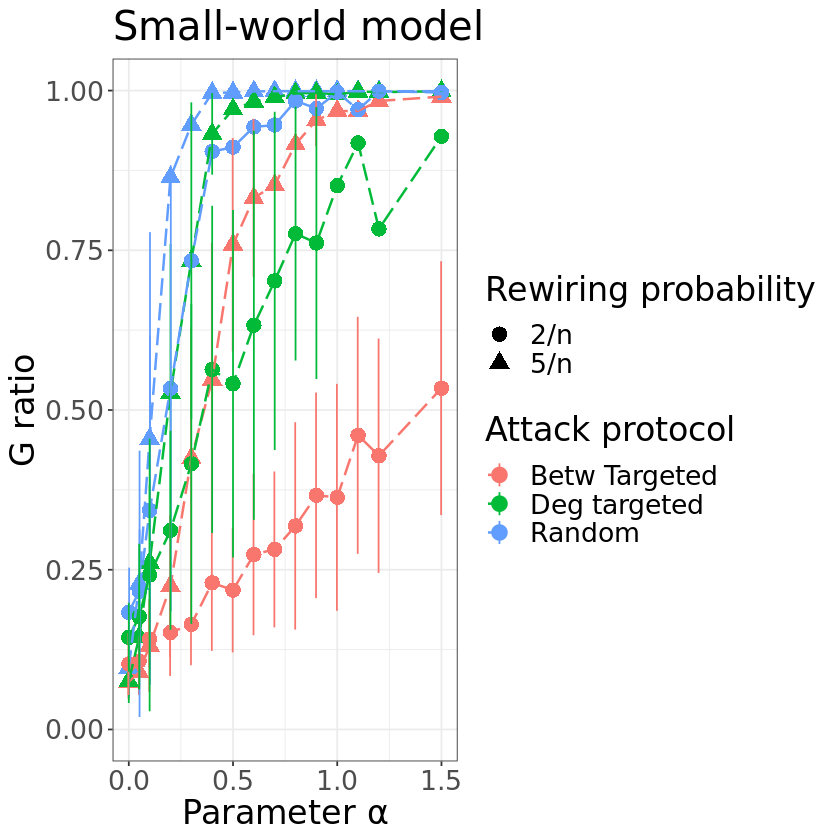

In [17]:
plot_all<-ggplot(df_sw_all, aes(x = alpha,
                            y = g_ratio)) +
geom_point(aes(col = type,
               shape=nei),
           size = 4) +
geom_line(aes(col = type,
              shape=nei),
          linewidth = 0.7,
          linetype=5) +
geom_linerange(aes(x = alpha,
                   ymin = g_ratio - g_ratio_sd,
                   ymax = g_ratio + g_ratio_sd,
                   col = type),
               position = position_dodge(0.005)) +
ylim(0, 1) +
# xlim(0, 0.2) +
labs(x = expression(paste("Parameter ", alpha)),
     y = "G ratio",
     col = "Attack protocol",
     shape='Rewiring probability',
     title = expression(paste("Small-world model"))) +
theme_bw() +
theme(text = element_text(size = 20))

plot_all

ggsave(plot = plot_all, filename = "sw_1000n_40means.pdf", width = 10,
    height = 7, scale = 0.75)